<a href="https://colab.research.google.com/github/jhuma26/Intel-Image-Classification/blob/main/Intel_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Dataset/Intel.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

In [ ]:
# Part 1 - Data Preprocessing

# Preprocessing the Training set

train_datagen=ImageDataGenerator(
  rescale=1./255,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True
)

In [ ]:
training_set=train_datagen.flow_from_directory('/tmp/seg_train/seg_train',
                                               target_size=(64,64),
                                               batch_size=32,
                                               class_mode='categorical')

Found 14034 images belonging to 6 classes.


In [ ]:
training_set.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [ ]:
# Preprocessing the test set

test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
test_set=test_datagen.flow_from_directory('/tmp/seg_test/seg_test',
                                          target_size=(64,64),
                                          batch_size=32,
                                          class_mode='categorical')

Found 3000 images belonging to 6 classes.


In [ ]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense

In [ ]:
from tensorflow.keras.regularizers import l2

In [ ]:
# Building the CNN
# Initializing the CNN

cnn=tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
#cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
## For Binary Classification
#cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
#             ='linear'))

In [ ]:
# for mulitclassification
cnn.add(Dense(6, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='softmax'))
cnn.compile(optimizer = 'adam', loss = 'squared_hinge', metrics = ['accuracy'])

In [ ]:
r=cnn.fit(x = training_set, validation_data = test_set, epochs = 60)

Epoch 1/60
439/439 [==============================] - 45s 77ms/step - loss: 1.1391 - accuracy: 0.5392 - val_loss: 1.0814 - val_accuracy: 0.6190
Epoch 2/60
439/439 [==============================] - 35s 79ms/step - loss: 1.0709 - accuracy: 0.6312 - val_loss: 1.0551 - val_accuracy: 0.6627
Epoch 3/60
439/439 [==============================] - 34s 77ms/step - loss: 1.0488 - accuracy: 0.6679 - val_loss: 1.0540 - val_accuracy: 0.6550
Epoch 4/60
439/439 [==============================] - 33s 76ms/step - loss: 1.0307 - accuracy: 0.6967 - val_loss: 1.0195 - val_accuracy: 0.7147
Epoch 5/60
439/439 [==============================] - 33s 75ms/step - loss: 1.0230 - accuracy: 0.7084 - val_loss: 1.0340 - val_accuracy: 0.6917
Epoch 6/60
439/439 [==============================] - 34s 76ms/step - loss: 1.0140 - accuracy: 0.7212 - val_loss: 1.0272 - val_accuracy: 0.7087
Epoch 7/60
439/439 [==============================] - 34s 77ms/step - loss: 1.0054 - accuracy: 0.7399 - val_loss: 1.0150 - val_accuracy:

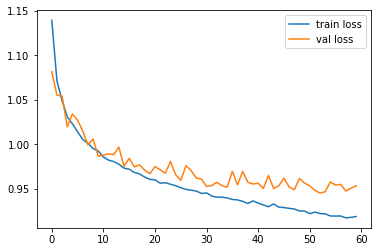

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


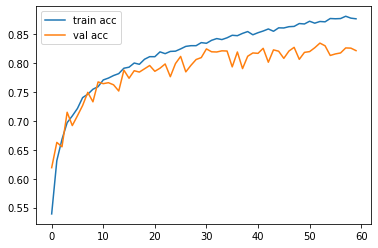

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# Part 4 - Making a single prediction

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/tmp/seg_test/seg_test/buildings/20064.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

In [ ]:
result

array([[0.14490399, 0.1586616 , 0.17557076, 0.19023423, 0.15945461,
        0.17117484]], dtype=float32)

In [ ]:
test_image

array([[[[0.5647059 , 0.6745098 , 0.92941177],
         [0.5647059 , 0.68235296, 0.9254902 ],
         [0.5686275 , 0.6862745 , 0.92941177],
         ...,
         [0.07843138, 0.28627452, 0.56078434],
         [0.34901962, 0.5882353 , 0.84313726],
         [0.4509804 , 0.63529414, 0.91764706]],

        [[0.5529412 , 0.67058825, 0.92156863],
         [0.5568628 , 0.6745098 , 0.9254902 ],
         [0.56078434, 0.6784314 , 0.92156863],
         ...,
         [0.46666667, 0.53333336, 0.74509805],
         [0.79607844, 0.80784315, 0.88235295],
         [0.7411765 , 0.75686276, 0.85490197]],

        [[0.5568628 , 0.6745098 , 0.9254902 ],
         [0.5568628 , 0.6745098 , 0.9254902 ],
         [0.56078434, 0.6784314 , 0.92156863],
         ...,
         [0.7647059 , 0.8156863 , 0.8784314 ],
         [0.9882353 , 0.9843137 , 0.9137255 ],
         [1.        , 0.99215686, 0.95686275]],

        ...,

        [[0.08235294, 0.        , 0.        ],
         [0.3019608 , 0.17254902, 0.        ]

In [ ]:
pred = np.argmax(cnn.predict(test_image),axis=1)

In [ ]:
pred

array([0])

In [ ]:
index = ['buildings','forest','glacier','mountain','sea','street']

In [ ]:
index[pred[0]]

'buildings'

### Prediction 2

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/tmp/seg_test/seg_test/buildings/20078.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

In [ ]:
result

array([[9.9999297e-01, 7.9673166e-09, 8.2419304e-15, 6.4692705e-07,
        6.3847469e-06, 6.1827423e-09]], dtype=float32)

In [ ]:
pred = np.argmax(cnn.predict(test_image),axis=1)

In [ ]:
pred

array([0])

In [ ]:
index = ['buildings','forest','glacier','mountain','sea','street']

In [ ]:
index[pred[0]]

'buildings'

### Prediction 3

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/tmp/seg_test/seg_test/glacier/20092.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

In [ ]:
pred = np.argmax(cnn.predict(test_image),axis=1)

In [ ]:
index[pred[0]]

'glacier'